# Importing the Libraries

In [1]:
#First we import the library 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

# Part 1: Importing Dataset

In [2]:
#Import dataset
import csv
vehicles_df = pd.read_csv('vehicles.csv')

In [3]:
vehicles_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# Part 2: Data Cleaning

In [4]:
# DATA CLEANING

#drop columns that won't be used - id, url, region-url, county

vehicles_df = vehicles_df.drop(['id', 'url', 'region_url','county'], axis=1)

pd.set_option('display.max_columns', 500)

# drop rows with more than 19/22 columns missing.

vehicles_df = vehicles_df[vehicles_df.isnull().sum(axis=1) < 19]

In [5]:
#check for null columns
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426812 entries, 27 to 426879
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426812 non-null  object 
 1   price         426812 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  image_url     426812 non-null  object 
 17  description   426810 non-null  object 
 18  sta

In [6]:
vehicles_df.isnull().sum() #look at each column that is useful but has many null values.
#There are no null region values. we will use that as a base for cleaning and replacing missing/wrong odometer and 0 price readings.

region               0
price                0
year              1137
manufacturer     17578
model             5209
condition       174036
cylinders       177610
fuel              2945
odometer          4332
title_status      8174
transmission      2488
VIN             160974
drive           130499
size            306293
type             92790
paint_color     130135
image_url            0
description          2
state                0
lat               6481
long              6481
posting_date         0
dtype: int64

In [7]:
vehicles_df.describe(include = 'all')  #see the composition of each column

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
count,426812,4.268120e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426812,426810,426812,420331.000000,420331.000000,426812
unique,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,241899,360886,51,NaN,NaN,381536
top,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,7357,231,50610,NaN,NaN,12
mean,NaN,7.520927e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,NaN,1.218325e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,NaN,2.648900e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


In [8]:
#Drop VIN, description,image URL, lat, long, posting date columns
vehicles_df.drop(['VIN', 'image_url', 'lat', 'long', 'posting_date'],axis=1, inplace=True)

In [9]:
vehicles_df.shape

(426812, 17)

In [10]:
vehicles_df.columns   #check remaining columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'description', 'state'],
      dtype='object')

# Part 3: Clean Explanatory Variables - Handling Missing Data

In [11]:
#Clean explanatory variables.

#We already have a large enough dataset to work with. 
#Instead of replacing the values and to make it easy for us to clean the values, let's drop na.
updated = vehicles_df.dropna()
updated

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,Here I have a unmolested Ford F-250 6.0 power ...,al
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,"Readily available. Excellent condition, clean ...",al
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,"Ford Super Duty F450 , XL with King Ranch seat...",al
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,"2017 dodge charger rt runs great $15,000.00",al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,wyoming,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,blue,Just in time for SPRING … for someone who has ...,wy
426809,wyoming,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV,black,Patina Survivor... RARE Original condition. ...,wy
426831,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,red,"All original 1985 300zx, it’s a Automatic 3000...",wy
426833,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,"Low mileage, garaged, no accidents, dents, or ...",wy


In [12]:
#Let's see if there is any more left.
updated.isnull().sum() #22 columns and 34585 rows all clean

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
description     0
state           0
dtype: int64

In [13]:
#Let's check the minimum odometer
min(updated.odometer)

0.0

In [14]:
# The minimum value on the odometer is 0. Usually any car under 200 miles is condsidered brand new,
# which is why we don't want to see values of 0.

In [15]:
max(updated.odometer) #checking for maximum odometer

10000000.0

In [16]:
#When an odometer reaches 999,999, it will either stay at 999,999 or turn to all zeroes.
#Let's remove any odometers larger than 999,999.

updated.drop(updated[updated['odometer'] > 999999].index, inplace = True)
updated

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,Here I have a unmolested Ford F-250 6.0 power ...,al
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,"Readily available. Excellent condition, clean ...",al
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,"Ford Super Duty F450 , XL with King Ranch seat...",al
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,"2017 dodge charger rt runs great $15,000.00",al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,wyoming,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,blue,Just in time for SPRING … for someone who has ...,wy
426809,wyoming,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV,black,Patina Survivor... RARE Original condition. ...,wy
426831,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,red,"All original 1985 300zx, it’s a Automatic 3000...",wy
426833,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,"Low mileage, garaged, no accidents, dents, or ...",wy


In [17]:
updated.loc[(updated.odometer == 0)] #first we checked how many odomoter readings showing 0. It returned 121 rows.

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
3959,mobile,4500,1997.0,gmc,sierra,good,6 cylinders,gas,0.0,clean,automatic,rwd,mid-size,truck,blue,Runs great. Cold AC and heat works. this is a ...,al
4267,mobile,4250,1995.0,ford,f150,good,8 cylinders,gas,0.0,clean,automatic,rwd,full-size,pickup,white,I have a 1995 ford f150 in good sound conditio...,al
4890,tuscaloosa,7000,1989.0,ford,bronco,good,6 cylinders,gas,0.0,clean,automatic,4wd,mid-size,other,green,This is a very depenable truck. I just had a n...,al
23203,bakersfield,66995,2018.0,ram,2500,excellent,6 cylinders,diesel,0.0,clean,automatic,4wd,full-size,pickup,grey,2018 *** RAM 2500 Laramie 4x4 Mega Cab 6'4 Box...,ca
23263,bakersfield,69995,2018.0,ram,2500,excellent,6 cylinders,diesel,0.0,clean,automatic,4wd,full-size,pickup,grey,2018 *** RAM 2500 Laramie 4x4 Mega Cab 6'4 Bo...,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379136,mcallen / edinburg,34999,2021.0,ford,ranger,new,4 cylinders,gas,0.0,clean,automatic,rwd,mid-size,truck,grey,BRAND NEW FORD RANGER XLT SPORT. CARBONIZED GR...,tx
395165,norfolk / hampton roads,6500,1963.0,ford,galaxie 500,good,6 cylinders,gas,0.0,rebuilt,automatic,fwd,full-size,other,blue,1963 ford Galixie 500 4 door 289 engine 24 inc...,va
397780,richmond,650,2000.0,jeep,grand cherokee laredo,fair,6 cylinders,gas,0.0,clean,automatic,4wd,mid-size,SUV,silver,2000Jeep Grand Cherokee for sale for parts Veh...,va
417642,green bay,6250,1968.0,chrysler,300,good,8 cylinders,gas,0.0,clean,automatic,rwd,full-size,coupe,green,1968 Chrysler 300 project. Comes with a 1968 ...,wi


In [18]:
updated.loc[(updated.odometer <= 200)] #we want to check for odometer values of cars with less than 200 miles
#because any car with odometer value of less than 200 miles would be considered new. 

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
3959,mobile,4500,1997.0,gmc,sierra,good,6 cylinders,gas,0.0,clean,automatic,rwd,mid-size,truck,blue,Runs great. Cold AC and heat works. this is a ...,al
4267,mobile,4250,1995.0,ford,f150,good,8 cylinders,gas,0.0,clean,automatic,rwd,full-size,pickup,white,I have a 1995 ford f150 in good sound conditio...,al
4628,montgomery,3500,1997.0,ford,f l50 xl long bed,fair,8 cylinders,gas,160.0,clean,automatic,4wd,full-size,truck,black,Truck is a beast. Motor is good. Tranny is goo...,al
4890,tuscaloosa,7000,1989.0,ford,bronco,good,6 cylinders,gas,0.0,clean,automatic,4wd,mid-size,other,green,This is a very depenable truck. I just had a n...,al
5095,anchorage / mat-su,0,2021.0,chevrolet,traverse,new,6 cylinders,gas,19.0,clean,automatic,fwd,mid-size,SUV,black,"Just In! 2021 Chevrolet Traverse FWD RS, Mosai...",ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423620,milwaukee,149,2021.0,kia,forte lxs,new,4 cylinders,gas,15.0,clean,automatic,fwd,full-size,sedan,orange,** CALL Michael Duda at 1-414-202-8517 to setu...,wi
423621,milwaukee,159,2021.0,kia,soul lx,new,4 cylinders,gas,14.0,clean,automatic,fwd,full-size,sedan,black,** CALL Michael Duda at 1-414-202-8517 to setu...,wi
423622,milwaukee,0,2020.0,kia,telluride,new,6 cylinders,gas,10.0,clean,automatic,4wd,full-size,SUV,black,** CALL Michael Duda at 1-414-202-8517 to setu...,wi
424282,milwaukee,3500,1969.0,cadillac,deville,good,8 cylinders,gas,0.0,clean,automatic,rwd,full-size,convertible,blue,restorable condition. motor and transmission ...,wi


In [19]:
updated.drop(updated[updated['odometer'] <= 200].index, inplace = True) #let's remove those columns.
updated

#we can see that the total number of rows went down to 78260 from 79045

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,Here I have a unmolested Ford F-250 6.0 power ...,al
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,"Readily available. Excellent condition, clean ...",al
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,"Ford Super Duty F450 , XL with King Ranch seat...",al
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,"2017 dodge charger rt runs great $15,000.00",al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,wyoming,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,blue,Just in time for SPRING … for someone who has ...,wy
426809,wyoming,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV,black,Patina Survivor... RARE Original condition. ...,wy
426831,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,red,"All original 1985 300zx, it’s a Automatic 3000...",wy
426833,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,"Low mileage, garaged, no accidents, dents, or ...",wy


In [20]:
#These are some error values that have been seen in the past
odometer_error_value_list = [1111,11111,111111,1234,12345,123456]

In [21]:
for i in odometer_error_value_list:
  if i in vehicles_df.odometer:
    print(i, True)

1111 True
11111 True
111111 True
1234 True
12345 True
123456 True


In [22]:
new_updated = updated[(updated.odometer!=1111) & (updated.odometer!=11111) & (updated.odometer!=111111) & (updated.odometer!=1234) & (updated.odometer!=12345) & (updated.odometer!=123456)]
new_updated

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,Here I have a unmolested Ford F-250 6.0 power ...,al
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,"Readily available. Excellent condition, clean ...",al
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,"Ford Super Duty F450 , XL with King Ranch seat...",al
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,"2017 dodge charger rt runs great $15,000.00",al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,wyoming,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,blue,Just in time for SPRING … for someone who has ...,wy
426809,wyoming,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV,black,Patina Survivor... RARE Original condition. ...,wy
426831,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,red,"All original 1985 300zx, it’s a Automatic 3000...",wy
426833,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,"Low mileage, garaged, no accidents, dents, or ...",wy


In [23]:
new_updated[new_updated['odometer'] == 12345] #here we check the values in the list no longer exist.

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state


In [24]:
vehicles_df.year.value_counts() #let's check for the consistency of the year values. 

2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1943.0        1
1915.0        1
1902.0        1
1905.0        1
1909.0        1
Name: year, Length: 114, dtype: int64

In [25]:
#Now let's fix the price column. We don't want to have 0 for prices.

new_updated[new_updated['price'] == 0] #this returns a whopping 3299 rows of "free" merchandise! Makes no sense.

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
126,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white,"2018 Chevrolet Express Cargo Van RWD 2500 135""...",al
127,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white,"2019 Chevrolet Express Cargo Van RWD 2500 135""...",al
128,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white,"2018 Chevrolet Express Cargo Van RWD 2500 135""...",al
244,birmingham,0,2017.0,chevrolet,silverado 2500hd 4x4,like new,8 cylinders,diesel,102000.0,clean,automatic,4wd,full-size,truck,silver,SELLJNG THIS AWESOME CHEVY 2500 Z71 4x4 DURAMA...,al
362,birmingham,0,2017.0,chevrolet,silverado 2500 z71 4x4,like new,8 cylinders,diesel,102000.0,clean,automatic,4wd,full-size,truck,silver,SELLING THIS AWESOME CHEVROLET 2500 HD 4x4 Z71...,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425403,sheboygan,0,2013.0,gmc,acadia,excellent,6 cylinders,gas,152207.0,clean,automatic,4wd,full-size,SUV,red,big> 2013 GMC Acadia SLE-2 - Crystal Red Tintc...,wi
425739,wausau,0,2019.0,dodge,pickups,new,3 cylinders,gas,100000.0,clean,manual,fwd,compact,bus,black,All Of These Vehicles & More Will Be Sold At T...,wi
426525,wyoming,0,1973.0,rover,defender,excellent,4 cylinders,diesel,48000.0,clean,manual,4wd,mid-size,SUV,yellow,Rare Land Rover Defender-Turbo Diesel-5-speed-...,wy
426539,wyoming,0,2016.0,toyota,4runner trd pro,excellent,6 cylinders,gas,45286.0,clean,automatic,4wd,full-size,SUV,brown,Phone: 320-275-2150 2016 Toyota 4Runner TRD ...,wy


In [26]:
new_updated.drop(new_updated[new_updated['price'] == 0].index, inplace = True)
new_updated

#this brings us down to 74814 rows.

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,Here I have a unmolested Ford F-250 6.0 power ...,al
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,"Readily available. Excellent condition, clean ...",al
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,"Ford Super Duty F450 , XL with King Ranch seat...",al
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,"2017 dodge charger rt runs great $15,000.00",al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426793,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,Stock #: 01201 Air Conditioning; Power Windows...,wy
426808,wyoming,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,blue,Just in time for SPRING … for someone who has ...,wy
426809,wyoming,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV,black,Patina Survivor... RARE Original condition. ...,wy
426831,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,red,"All original 1985 300zx, it’s a Automatic 3000...",wy


In [27]:
min(new_updated.price) #we want to see the minimum price of a listed car. 
# $1 is a ridiculus offer so we want filter for sensible prices.

1

In [28]:
#First, let's see how many cars are listed below $5000 (this is the price we feel comfortable scanning for). 
new_updated[new_updated['price'] < 5000] #this returns 17056 rows of cars listed below $5000.

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
86,auburn,3000,2004.0,chrysler,town & country,good,6 cylinders,gas,176144.0,clean,automatic,fwd,mid-size,mini-van,silver,2004 Chrysler Town & Country Touring. Seats 7....,al
138,auburn,4000,2006.0,jeep,grand cherokee laredo,good,6 cylinders,gas,281000.0,clean,automatic,rwd,mid-size,SUV,black,2006 Jeep Grand Cherokee Laredo FOR SALE BY OW...,al
215,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,This sky blue Toyota Echo has an excellent Car...,al
217,birmingham,3000,2004.0,chevrolet,blazer,good,6 cylinders,gas,131500.0,clean,automatic,4wd,mid-size,SUV,white,2004 S10 blazer has 131500 miles rebuilt trans...,al
219,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,For sale is a 1995 BMW 525i. Engine runs great...,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426558,wyoming,1200,1999.0,volvo,s70,fair,4 cylinders,gas,252582.0,clean,automatic,4wd,mid-size,sedan,silver,1999 Volvo S70 AWD Sedan 4D MileageEdit 253000...,wy
426643,wyoming,4200,2001.0,toyota,sequoia,fair,8 cylinders,gas,287000.0,clean,automatic,4wd,full-size,SUV,white,2001 Sequoia for sale. She's getting up there ...,wy
426689,wyoming,1800,1997.0,toyota,4runner,good,6 cylinders,gas,239000.0,clean,automatic,rwd,full-size,SUV,white,1997 Toyota Forerunner. Runs well and dependab...,wy
426737,wyoming,2500,2005.0,honda,civic,good,4 cylinders,gas,185000.0,clean,manual,fwd,compact,sedan,grey,Maintenance is up to date. I have been using ...,wy


In [29]:
#Let's filter and drop offers listed below $5000.
new_updated.drop(new_updated[new_updated['price'] < 5000].index, inplace = True)
new_updated

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,Here I have a unmolested Ford F-250 6.0 power ...,al
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,"Readily available. Excellent condition, clean ...",al
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,"Ford Super Duty F450 , XL with King Ranch seat...",al
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,"2017 dodge charger rt runs great $15,000.00",al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426793,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,Stock #: 01201 Air Conditioning; Power Windows...,wy
426808,wyoming,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,blue,Just in time for SPRING … for someone who has ...,wy
426809,wyoming,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV,black,Patina Survivor... RARE Original condition. ...,wy
426831,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,red,"All original 1985 300zx, it’s a Automatic 3000...",wy


In [30]:
max(new_updated.price) #3billion dollars is also kind of a lot to consider for a used car. 
# We want to focus our data on cars less than $500,000.

3736928711

In [31]:
new_updated[new_updated['price'] > 500000] #good news! only 8 rows have prices over $500,000.

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
29386,humboldt county,1111111111,1999.0,ford,f350 super duty lariat,good,8 cylinders,diesel,149000.0,clean,automatic,rwd,full-size,pickup,white,Thank you to everyone that contacted me concer...,ca
68935,ventura county,2000000,2002.0,saturn,l-series l200 4dr sedan,good,4 cylinders,gas,164290.0,clean,automatic,fwd,mid-size,sedan,green,No longer need runs and drives great. This ca...,ca
136516,spokane / coeur d'alene,17000000,2007.0,ram,2500,good,8 cylinders,diesel,170000.0,rebuilt,automatic,4wd,full-size,pickup,black,07 dodge 2500 mega cab 5.9 diesel 6in lift bul...,id
137807,spokane / coeur d'alene,123456789,1999.0,buick,regal,like new,6 cylinders,gas,96000.0,clean,automatic,fwd,full-size,sedan,white,This supercharged regal is no longer charged s...,id
219241,southwest MS,1111111,1970.0,dodge,challenger,fair,8 cylinders,gas,42000.0,clean,automatic,rwd,full-size,coupe,blue,"Selling collection , 30 restored or super clea...",ms
230753,asheville,135008900,2008.0,nissan,titan se kingcab,like new,8 cylinders,gas,110500.0,clean,automatic,4wd,full-size,truck,grey,2008 Nissan Titan Se Kingcab 4door(suicide doo...,nc
307488,stillwater,123456789,1996.0,gmc,sierra 2500,fair,8 cylinders,gas,320000.0,clean,automatic,4wd,full-size,pickup,black,"$99,666 Not Really! It’s the worse truck...",ok
318592,eugene,3736928711,2007.0,toyota,tundra,excellent,8 cylinders,gas,164000.0,clean,automatic,4wd,full-size,pickup,silver,Selling my 2007 Toyota Tundra SR5 four wheel d...,or


In [32]:
#Let's remove those from our dataset.
new_updated.drop(new_updated[new_updated['price'] > 500000].index, inplace = True)
new_updated

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,Here I have a unmolested Ford F-250 6.0 power ...,al
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,"Readily available. Excellent condition, clean ...",al
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,"Ford Super Duty F450 , XL with King Ranch seat...",al
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,"2017 dodge charger rt runs great $15,000.00",al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426793,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,Stock #: 01201 Air Conditioning; Power Windows...,wy
426808,wyoming,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,blue,Just in time for SPRING … for someone who has ...,wy
426809,wyoming,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV,black,Patina Survivor... RARE Original condition. ...,wy
426831,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,red,"All original 1985 300zx, it’s a Automatic 3000...",wy


In [33]:
max(new_updated.price) #new maximum price is $195000, which makes a lot more sense.

195000

# Part 4A: Data Aggregation

In [34]:
#Let's group the data by the car type.

type = new_updated.groupby('type')['type'].count().sort_values(ascending = False)
type

type
SUV            15284
sedan          13806
truck          11377
pickup          5406
coupe           2954
van             2265
hatchback       2123
convertible     1837
mini-van        1077
wagon            957
other            301
offroad          277
bus               86
Name: type, dtype: int64

In [35]:
#Let's group the data by the paint color.

paint_color = new_updated.groupby('paint_color')['paint_color'].count().sort_values(ascending = False)
paint_color

paint_color
white     15154
black     10690
silver     7940
grey       7107
blue       5789
red        5643
brown      1562
green      1513
custom     1425
yellow      453
orange      336
purple      138
Name: paint_color, dtype: int64

In [36]:
# if the year of the car is <2000, assign condition to be fairly new else make it 'good'
new_updated.loc[(new_updated['year'] <= 2000), 'condition'] = 'fair'
new_updated.loc[(new_updated['year'] > 2000), 'condition'] = 'good'
new_updated.condition

31        good
55        good
59        good
65        good
73        good
          ... 
426793    good
426808    good
426809    fair
426831    fair
426833    fair
Name: condition, Length: 57750, dtype: object

In [37]:
condition = new_updated.groupby('condition')['condition'].count()
condition #here we can see we have 7957 cars in fair condition and 66857 cars in good condition that are built after year 2000.

condition
fair     4687
good    53063
Name: condition, dtype: int64

In [38]:
manufacturer = new_updated.groupby('manufacturer')['manufacturer'].count().sort_values(ascending = False)
manufacturer #below we can see Ford, Chevrolet and Toyota are have the most offers.

manufacturer
ford               12039
chevrolet           9010
toyota              5088
honda               3181
nissan              2796
gmc                 2590
ram                 2428
jeep                2363
bmw                 1654
dodge               1619
subaru              1475
mercedes-benz       1466
volkswagen          1278
hyundai             1165
lexus               1020
kia                  956
cadillac             855
chrysler             780
audi                 731
mazda                645
buick                627
infiniti             485
acura                481
lincoln              467
mitsubishi           414
mini                 343
pontiac              339
volvo                336
rover                266
porsche              244
jaguar               165
mercury              140
fiat                 103
saturn                90
tesla                 30
alfa-romeo            24
harley-davidson       23
ferrari               12
datsun                11
land rover  

# Part 4B: Data Visualization

In [39]:
#Check for outlier values

<AxesSubplot:xlabel='odometer'>

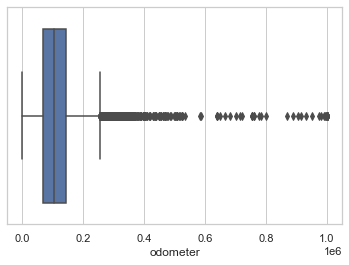

In [40]:
#let's check for odometer outliers
sns.set_theme(style="whitegrid")
sns.boxplot(x=new_updated['odometer'])

<AxesSubplot:xlabel='price'>

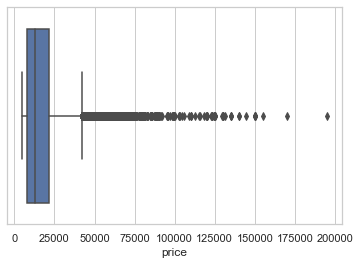

In [41]:
#let's check for price outliers
sns.set_theme(style="whitegrid")
sns.boxplot(x=new_updated['price']) #here we can see that we have more cars listed below $125,000.
# Only 3 cars being listed above the price of $150,000.

In [42]:
new_updated.describe(include = 'all') #to see the values better from box plot above. 

#Below we can see the mean odometer reading is 108660, minimum odometer reading is 205 and maximum is at 999,999. 
#Standard deviation is 61649, which shows the distance of the data points from the mean.
#68000 is below 25%, 105000 is below 50% and 143000 is below 75%.

#For the price readings, mean price was $16849, minimum price being at $5000 and maximum at $195,000.
#Standard deviation for price is 12411. 
#25% of the cars are priced below $7999, 50% are below $12950, 75% are below $21598.

#For model year, average model year was 2009. St. dev was 10. Minimum year was 1900 and maximum year was 2021.
#25% of cars were below 2007, 50% below 2012 and 75% were below 2015.

#the Top/Most listed model of the dataset was Ford f-150.
#Total count of the dataset was 57750.

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
count,57750,57750.000000,57750.000000,57750,57750,57750,57750,57750,57750.000000,57750,57750,57750,57750,57750,57750,57750,57750
unique,403,NaN,NaN,41,7877,2,8,5,NaN,6,3,3,4,13,12,48435,51
top,vermont,NaN,NaN,ford,f-150,good,8 cylinders,gas,NaN,clean,automatic,4wd,full-size,SUV,white,Call or text today to find out more. (602) 620...,ca
freq,883,NaN,NaN,12039,1230,53063,19370,51952,NaN,54040,53442,26622,34300,15284,15154,195,6352
mean,NaN,16849.700641,2009.598909,NaN,NaN,NaN,NaN,NaN,108660.895792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,12411.676500,9.844887,NaN,NaN,NaN,NaN,NaN,61649.023235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,5000.000000,1900.000000,NaN,NaN,NaN,NaN,NaN,205.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,7999.000000,2007.000000,NaN,NaN,NaN,NaN,NaN,68000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,12950.000000,2012.000000,NaN,NaN,NaN,NaN,NaN,105000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,21598.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,143000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

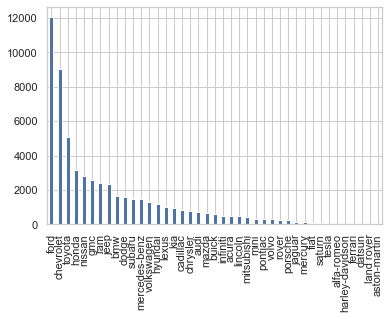

In [43]:
new_updated['manufacturer'].value_counts().plot(kind='bar') 
#here we can see Ford, Chevrolet and Toyota brands sold the most.

<AxesSubplot:>

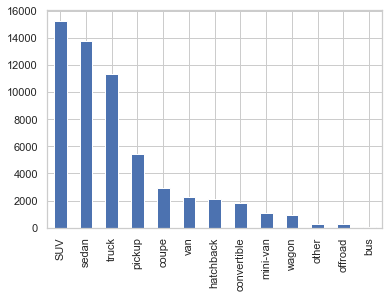

In [44]:
new_updated['type'].value_counts().plot(kind='bar') #this shows the most sold car make was sedans followed by SUVs and trucks.

<AxesSubplot:xlabel='year'>

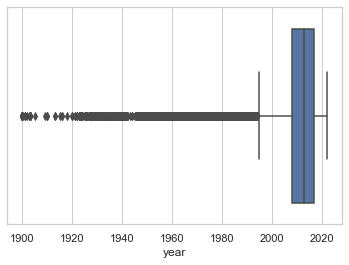

In [45]:
sns.boxplot(x=vehicles_df.year)
#Majority of the years are within 2000-2020

In [46]:
new_updated=new_updated[new_updated['year'] > 2017]

manufacturer_names = ['ford','toyota','chevrolet','honda','nissan']
new_updated=new_updated[new_updated['manufacturer'].isin( manufacturer_names ) ]

In [47]:
new_updated.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
339,birmingham,50000,2019.0,toyota,tundra,good,8 cylinders,gas,20010.0,clean,automatic,4wd,full-size,truck,white,For sale by owner 2019 Toyota Tundra TRD Spor...,al
365,birmingham,72900,2021.0,chevrolet,tahoe,good,8 cylinders,gas,19129.0,clean,automatic,4wd,full-size,SUV,grey,"2021 Chevrolet Tahoe 1500 Z71 - $72,900 Year:...",al
367,birmingham,17000,2019.0,chevrolet,trax,good,4 cylinders,gas,14898.0,clean,automatic,4wd,full-size,SUV,grey,"2019 Chevrolet Trax LS - $17,000 Year: 2019 M...",al
439,birmingham,48900,2018.0,chevrolet,silverado 2500 hd ltz,good,8 cylinders,diesel,43034.0,rebuilt,automatic,4wd,full-size,truck,black,VEHICLE INFO: 2018 Chevrolet Silverado 2500HD ...,al
441,birmingham,24888,2019.0,ford,f150 regular cab xl,good,6 cylinders,gas,8176.0,clean,automatic,rwd,full-size,pickup,white,NICE CLEAN 2WD PICKUP. LOCALLY TRADED WITH E...,al


Text(0.5, 1.0, 'Numbers of cars sold for top models between years 2018-2021')

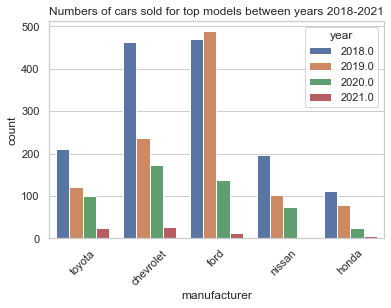

In [48]:
sns.countplot(x=new_updated['manufacturer'],hue=new_updated['year'],data=new_updated)

sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=45)
plt.title("Numbers of cars sold for top models between years 2018-2021")

#Ford sold the most cars in the the years 2018 and 2019. 
#While Chevrolet also sold almost the same amount in 2018, there was a huge decline in it's sale in 2019.

#A common trend between all the manufacturers was that they all declined between 2018 and 2021.

In [49]:
new_updated=new_updated[(new_updated['price'] < 17000) & (new_updated['price'] > 16500)] 
#let's check the median price range for our top models.

manufacturer_names_new = ['ford','toyota','chevrolet','honda','nissan']
new_updated=new_updated[new_updated['manufacturer'].isin( manufacturer_names_new ) ]

In [50]:
new_updated.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
5544,anchorage / mat-su,16900,2018.0,toyota,corolla le,good,4 cylinders,gas,15285.0,clean,automatic,4wd,mid-size,sedan,red,2018 Toyota Corolla LE Automatic Front wheel...,ak
32789,los angeles,16900,2019.0,nissan,rogue sport,good,4 cylinders,gas,41082.0,clean,automatic,4wd,compact,SUV,black,2019 *** Nissan Rogue Sport AWD S SUV *** R...,ca
32884,los angeles,16900,2019.0,nissan,rogue sport,good,4 cylinders,gas,41082.0,clean,automatic,4wd,compact,SUV,black,2019 *** Nissan Rogue Sport AWD S SUV *** R...,ca
64100,stockton,16995,2018.0,chevrolet,malibu lt,good,4 cylinders,gas,76677.0,clean,automatic,fwd,mid-size,sedan,red,"You view the History Report, our entire invent...",ca
65342,stockton,16995,2018.0,chevrolet,malibu lt,good,4 cylinders,gas,76677.0,clean,automatic,fwd,mid-size,sedan,red,"You view the History Report, our entire invent...",ca


Text(0.5, 1.0, 'Price breakdown for the top car manufacturers')

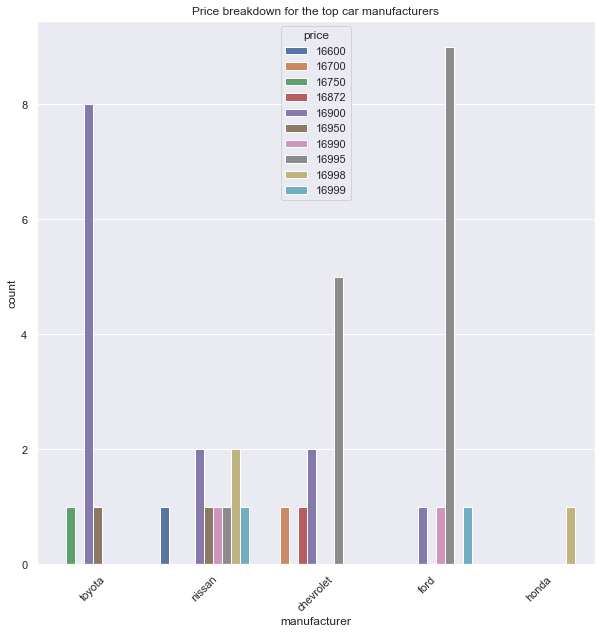

In [51]:
sns.countplot(x=new_updated['manufacturer'],hue=new_updated['price'],data=new_updated)

sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=45)
plt.title("Price breakdown for the top car manufacturers") 

#below we can see that Nissan was listed the most between the prices $16500 and $17000, 
#which was followed by Ford,Chevrolet,Toyota, then Honda.

REFERENCES

[1]“Used Cars Dataset,” www.kaggle.com. https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

[2]T. Shin, “A Machine Learning Project — Predicting Used Car Prices,” Medium, May 06, 2020. https://towardsdatascience.com/a-machine-learning-project-predicting-used-car-prices-efbc4d2a4998 (accessed Dec. 02, 2022).

[3]Elladuke, “Elladuke/SCAMP-FINAL-PROJECT-INDI,” GitHub, May 20, 2021. https://github.com/Elladuke/SCAMP-FINAL-PROJECT-INDI/blob/master/new_vehicle.csv (accessed Dec. 02, 2022).